In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
train = pd.read_csv('./15_modified_data/train_data.csv')
train.head()
train.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'date', 'max_temp',
       'min_temp', 'precip', 'snow', 'snow_depth', 'wind_speed',
       'pickup_community_name', 'dropoff_community_name', 'year', 'month',
       'day', 'day_of_week', 'hour', 'weekend', 'nonzero_tip'],
      dtype='object')

In [3]:
train['nonzero_tip'].value_counts()

0    68654
1    15049
Name: nonzero_tip, dtype: int64

In [29]:
# train['nonzero_tip1'] = 1
# train.loc[(train['nonzero_tip'] == 1), 'nonzero_tip1'] = 0
# train.loc[(train['nonzero_tip'] == 0), 'nonzero_tip1'] = 1


In [30]:
# train['nonzero_tip1'].value_counts()

In [31]:
# train['nonzero_tip'] = train['nonzero_tip1']
# train['nonzero_tip'].value_counts()
# train.drop(['nonzero_tip1'], axis = 1, inplace = True)

In [32]:
# train = train[train['trip_miles'] != 0]

In [4]:
y = train['nonzero_tip']
len(y)


83703

In [5]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
train['month_int'] = train['month'].map(month_map)
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
train['day_ofweek_int'] = train['day_of_week'].map(day_map)
# train['day_ofweek_int'].value_counts()
train.drop(['day_of_week', 'month' ], axis=1, inplace=True)

In [88]:
len(train[train['trip_miles'] != 0])

83697

In [89]:
len(train[train['trip_miles'] == 0])

6

In [87]:
len(train[train['fare'] == 0])

784

In [6]:
train['amount_per_miles'] = train['fare'] / train['trip_miles']
train['amount_per_miles'].isnull().sum()
train['amount_per_miles']  = round(train['amount_per_miles'], 2)


In [7]:
train.loc[(train['trip_miles'] == 0), 'amount_per_miles'] = 0


In [8]:
train['time_of_day'] = 's'
train.loc[(train['hour'] >= 4) & (train['hour'] < 7), 'time_of_day'] = 'early morning'
train.loc[(train['hour'] >= 7) & (train['hour'] < 11), 'time_of_day'] = 'morning rush hour'
train.loc[(train['hour'] >= 11) & (train['hour'] < 14), 'time_of_day'] = 'midday'
train.loc[(train['hour'] >= 14) & (train['hour'] < 16), 'time_of_day'] = 'afternoon'
train.loc[(train['hour'] >= 16) & (train['hour'] < 19), 'time_of_day'] = 'aft rush hour'
train.loc[(train['hour'] >= 19) & (train['hour'] < 23), 'time_of_day'] = 'evening'
train.loc[(train['hour'] >= 23) | (train['hour'] < 4), 'time_of_day'] = 'late night'



In [9]:
train['season'] = 's'
train.loc[(train['month_int'] >= 3) & (train['month_int'] <= 5), 'season'] = 'spring'
train.loc[(train['month_int'] >= 6) & (train['month_int'] <= 8), 'season'] = 'summer'
train.loc[(train['month_int'] >= 9) & (train['month_int'] <= 11), 'season'] = 'autumn'
train.loc[(train['month_int'] >= 12) | (train['month_int'] <= 2), 'season'] = 'winter'

In [10]:
train['public_hol'] = 0

In [11]:
train.loc[(train['month_int'] == 1) & (train['day'] == 1), 'public_hol'] = 1
train.loc[(train['month_int'] == 6) & (train['day'] == 19), 'public_hol'] = 1
train.loc[(train['month_int'] == 7) & (train['day'] == 4), 'public_hol'] = 1
train.loc[(train['month_int'] == 11) & (train['day'] == 11), 'public_hol'] = 1
train.loc[(train['month_int'] == 12) & (train['day'] == 25), 'public_hol'] = 1

# MLK
train.loc[(train['month_int'] == 1) & (train['day'] == 15) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 1) & (train['day'] == 21) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 1) & (train['day'] == 20) & (train['year'] == 2020), 'public_hol'] = 1

# presidents day
train.loc[(train['month_int'] == 2) & (train['day'] == 19) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 2) & (train['day'] == 18) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 2) & (train['day'] == 17) & (train['year'] == 2020), 'public_hol'] = 1

# memorial
train.loc[(train['month_int'] == 5) & (train['day'] == 28) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 5) & (train['day'] == 27) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 5) & (train['day'] == 25) & (train['year'] == 2020), 'public_hol'] = 1

# labour day
train.loc[(train['month_int'] == 9) & (train['day'] == 3) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 9) & (train['day'] == 2) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 9) & (train['day'] == 7) & (train['year'] == 2020), 'public_hol'] = 1


# columbus day
train.loc[(train['month_int'] == 10) & (train['day'] == 8) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 10) & (train['day'] == 14) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 10) & (train['day'] == 12) & (train['year'] == 2020), 'public_hol'] = 1


# thanksgiving
train.loc[(train['month_int'] == 11) & (train['day'] == 22) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 11) & (train['day'] == 28) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 11) & (train['day'] == 26) & (train['year'] == 2020), 'public_hol'] = 1


In [12]:
train['public_hol'].isnull().sum()

0

In [13]:
X = pd.get_dummies(train, columns = ['dropoff_community_name', 'pickup_community_name', 'time_of_day', 'season'])
X.drop(['nonzero_tip', 'tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)

In [14]:
scaler = MinMaxScaler()

In [15]:
pd.set_option('display.max_rows', None)


In [16]:
X.isnull().sum()

trip_seconds                                     0
trip_miles                                       0
fare                                             0
additional_charges                               0
shared_trip_authorized                           0
trips_pooled                                     0
max_temp                                         0
min_temp                                         0
precip                                           0
snow                                             0
snow_depth                                       0
wind_speed                                       0
year                                             0
day                                              0
hour                                             0
weekend                                          0
month_int                                        0
day_ofweek_int                                   0
amount_per_miles                                 0
public_hol                     

In [17]:
X.head()

,trip_seconds,trip_miles,fare,additional_charges,shared_trip_authorized,trips_pooled,max_temp,min_temp,precip,snow,...,time_of_day_afternoon,time_of_day_early morning,time_of_day_evening,time_of_day_late night,time_of_day_midday,time_of_day_morning rush hour,season_autumn,season_spring,season_summer,season_winter
0,802.0,6.183132,10.0,2.55,False,1,80.06,80.06,0.000000,0.0,...,0,1,0,0,0,0,1,0,0,0
1,2349.0,18.248731,35.0,8.11,False,1,78.98,78.98,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
2,684.0,5.277118,10.0,2.50,False,1,37.04,37.04,1.181102,0.0,...,0,0,0,1,0,0,1,0,0,0
3,698.0,3.079843,7.5,2.55,False,1,48.92,48.92,0.196850,0.0,...,0,0,0,0,1,0,0,0,0,1
4,812.0,2.996371,7.5,2.50,False,1,60.08,60.08,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1


In [18]:
scaler.fit(X)

MinMaxScaler()

In [19]:
val = pd.read_csv('./15_modified_data/val_data.csv')
val.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,...,wind_speed,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2018-11-18 07:00:00,2018-11-18 07:00:00,100.0,0.572958,2.5,0,2.50,False,1,2018-11-18,...,100.66230,IRVING PARK,IRVING PARK,2018,November,18,Sunday,7,1,0
1,2020-01-22 09:30:00,2020-01-22 09:45:00,986.0,4.142381,10.0,0,4.83,False,1,2020-01-22,...,170.00744,NEAR NORTH SIDE,LOOP,2020,January,22,Wednesday,9,0,0
2,2018-11-26 18:45:00,2018-11-26 19:00:00,584.0,1.830871,5.0,1,2.50,False,1,2018-11-26,...,331.06712,LAKE VIEW,LINCOLN PARK,2018,November,26,Monday,18,0,1
3,2018-12-30 15:15:00,2018-12-30 15:30:00,819.0,4.976403,10.0,0,2.50,False,1,2018-12-30,...,210.27236,SOUTH SHORE,FULLER PARK,2018,December,30,Sunday,15,1,0
4,2019-07-01 23:45:00,2019-07-02 00:00:00,1162.0,8.918748,15.0,2,2.55,False,1,2019-07-01,...,170.00744,NEAR WEST SIDE,EDGEWATER,2019,July,1,Monday,23,0,1


In [50]:
# val = val[val['trip_miles'] != 0]

In [20]:
val_y = val['nonzero_tip']
len(val_y)


11957

In [52]:
# val['nonzero_tip1'] = 1
# val.loc[(val['nonzero_tip'] == 1), 'nonzero_tip1'] = 0
# val.loc[(val['nonzero_tip'] == 0), 'nonzero_tip1'] = 1


In [53]:
# val['nonzero_tip'] = val['nonzero_tip1']
# val['nonzero_tip'].value_counts()
# val.drop(['nonzero_tip1'], axis = 1, inplace = True)

In [21]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
val['month_int'] = val['month'].map(month_map)
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
val['day_ofweek_int'] = val['day_of_week'].map(day_map)
# val['day_ofweek_int'].value_counts()
val.drop(['day_of_week', 'month' ], axis=1, inplace=True)

In [22]:
val['amount_per_miles'] = val['fare'] / val['trip_miles']
val['amount_per_miles'].isnull().sum()
val['amount_per_miles']  = round(val['amount_per_miles'], 2)
val.loc[(val['trip_miles'] == 0), 'amount_per_miles'] = 0



In [23]:
val['time_of_day'] = 's'
val.loc[(val['hour'] >= 4) & (val['hour'] < 7), 'time_of_day'] = 'early morning'
val.loc[(val['hour'] >= 7) & (val['hour'] < 11), 'time_of_day'] = 'morning rush hour'
val.loc[(val['hour'] >= 11) & (val['hour'] < 14), 'time_of_day'] = 'midday'
val.loc[(val['hour'] >= 14) & (val['hour'] < 16), 'time_of_day'] = 'afternoon'
val.loc[(val['hour'] >= 16) & (val['hour'] < 19), 'time_of_day'] = 'aft rush hour'
val.loc[(val['hour'] >= 19) & (val['hour'] < 23), 'time_of_day'] = 'evening'
val.loc[(val['hour'] >= 23) | (val['hour'] < 4), 'time_of_day'] = 'late night'



In [24]:
val['season'] = 's'
val.loc[(val['month_int'] >= 3) & (val['month_int'] <= 5), 'season'] = 'spring'
val.loc[(val['month_int'] >= 6) & (val['month_int'] <= 8), 'season'] = 'summer'
val.loc[(val['month_int'] >= 9) & (val['month_int'] <= 11), 'season'] = 'autumn'
val.loc[(val['month_int'] >= 12) | (val['month_int'] <= 2), 'season'] = 'winter'

In [25]:
val['public_hol'] =0
val.loc[(val['month_int'] == 1) & (val['day'] == 1), 'public_hol'] = 1
val.loc[(val['month_int'] == 6) & (val['day'] == 19), 'public_hol'] = 1
val.loc[(val['month_int'] == 7) & (val['day'] == 4), 'public_hol'] = 1
val.loc[(val['month_int'] == 11) & (val['day'] == 11), 'public_hol'] = 1
val.loc[(val['month_int'] == 12) & (val['day'] == 25), 'public_hol'] = 1

# MLK
val.loc[(val['month_int'] == 1) & (val['day'] == 15) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 1) & (val['day'] == 21) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 1) & (val['day'] == 20) & (val['year'] == 2020), 'public_hol'] = 1

# presidents day
val.loc[(val['month_int'] == 2) & (val['day'] == 19) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 2) & (val['day'] == 18) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 2) & (val['day'] == 17) & (val['year'] == 2020), 'public_hol'] = 1

# memorial
val.loc[(val['month_int'] == 5) & (val['day'] == 28) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 5) & (val['day'] == 27) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 5) & (val['day'] == 25) & (val['year'] == 2020), 'public_hol'] = 1

# labour day
val.loc[(val['month_int'] == 9) & (val['day'] == 3) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 9) & (val['day'] == 2) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 9) & (val['day'] == 7) & (val['year'] == 2020), 'public_hol'] = 1


# columbus day
val.loc[(val['month_int'] == 10) & (val['day'] == 8) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 10) & (val['day'] == 14) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 10) & (val['day'] == 12) & (val['year'] == 2020), 'public_hol'] = 1


# thanksgiving
val.loc[(val['month_int'] == 11) & (val['day'] == 22) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 11) & (val['day'] == 28) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 11) & (val['day'] == 26) & (val['year'] == 2020), 'public_hol'] = 1


In [26]:
val['public_hol'].value_counts()
val['public_hol'].isnull().sum()

0

In [27]:
val_X = pd.get_dummies(val, columns = ['dropoff_community_name', 'pickup_community_name', 'time_of_day', 'season'])
val_X.drop(['nonzero_tip', 'tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)

In [28]:
train.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'date', 'max_temp',
       'min_temp', 'precip', 'snow', 'snow_depth', 'wind_speed',
       'pickup_community_name', 'dropoff_community_name', 'year', 'day',
       'hour', 'weekend', 'nonzero_tip', 'month_int', 'day_ofweek_int',
       'amount_per_miles', 'time_of_day', 'season', 'public_hol'],
      dtype='object')

In [29]:
len(X.columns)
# len(val_X.columns)


185

In [63]:
pd.set_option('display.max_rows', None)


In [30]:
scaler.fit(val_X)

MinMaxScaler()

In [65]:
val_X.isnull().sum()

trip_seconds                                     0
trip_miles                                       0
fare                                             0
additional_charges                               0
shared_trip_authorized                           0
trips_pooled                                     0
max_temp                                         0
min_temp                                         0
precip                                           0
snow                                             0
snow_depth                                       0
wind_speed                                       0
year                                             0
day                                              0
hour                                             0
weekend                                          0
month_int                                        0
day_ofweek_int                                   0
amount_per_miles                                 0
public_hol                     

In [31]:
X.drop(['dropoff_community_name_RIVERDALE'], axis = 1, inplace=True)

In [32]:
test = pd.read_csv('./15_modified_data/test_data.csv')
test.head()
test.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'date', 'max_temp',
       'min_temp', 'precip', 'snow', 'snow_depth', 'wind_speed',
       'pickup_community_name', 'dropoff_community_name', 'year', 'month',
       'day', 'day_of_week', 'hour', 'weekend', 'nonzero_tip'],
      dtype='object')

In [68]:
# test = test[test['trip_miles'] != 0]

In [33]:
test_y = test['nonzero_tip']
len(test_y)


23916

In [34]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
test['month_int'] = test['month'].map(month_map)
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
test['day_ofweek_int'] = test['day_of_week'].map(day_map)
# test['day_ofweek_int'].value_counts()
test.drop(['day_of_week', 'month' ], axis=1, inplace=True)

In [71]:
len(test[test['trip_miles'] != 0])

23909

In [35]:
test['amount_per_miles'] = test['fare'] / test['trip_miles']
test['amount_per_miles'].isnull().sum()
test['amount_per_miles']  = round(test['amount_per_miles'], 2)
test.loc[(test['trip_miles'] == 0), 'amount_per_miles'] = 0



In [36]:
test['time_of_day'] = 's'
test.loc[(test['hour'] >= 4) & (test['hour'] < 7), 'time_of_day'] = 'early morning'
test.loc[(test['hour'] >= 7) & (test['hour'] < 11), 'time_of_day'] = 'morning rush hour'
test.loc[(test['hour'] >= 11) & (test['hour'] < 14), 'time_of_day'] = 'midday'
test.loc[(test['hour'] >= 14) & (test['hour'] < 16), 'time_of_day'] = 'afternoon'
test.loc[(test['hour'] >= 16) & (test['hour'] < 19), 'time_of_day'] = 'aft rush hour'
test.loc[(test['hour'] >= 19) & (test['hour'] < 23), 'time_of_day'] = 'evening'
test.loc[(test['hour'] >= 23) | (test['hour'] < 4), 'time_of_day'] = 'late night'



In [37]:
test['season'] = 's'
test.loc[(test['month_int'] >= 3) & (test['month_int'] <= 5), 'season'] = 'spring'
test.loc[(test['month_int'] >= 6) & (test['month_int'] <= 8), 'season'] = 'summer'
test.loc[(test['month_int'] >= 9) & (test['month_int'] <= 11), 'season'] = 'autumn'
test.loc[(test['month_int'] >= 12) | (test['month_int'] <= 2), 'season'] = 'winter'

In [38]:
test['public_hol'] = 0

test.loc[(test['month_int'] == 1) & (test['day'] == 1), 'public_hol'] = 1
test.loc[(test['month_int'] == 6) & (test['day'] == 19), 'public_hol'] = 1
test.loc[(test['month_int'] == 7) & (test['day'] == 4), 'public_hol'] = 1
test.loc[(test['month_int'] == 11) & (test['day'] == 11), 'public_hol'] = 1
test.loc[(test['month_int'] == 12) & (test['day'] == 25), 'public_hol'] = 1

# MLK
test.loc[(test['month_int'] == 1) & (test['day'] == 15) & (test['year'] == 2018), 'public_hol'] = 1
test.loc[(test['month_int'] == 1) & (test['day'] == 21) & (test['year'] == 2019), 'public_hol'] = 1
test.loc[(test['month_int'] == 1) & (test['day'] == 20) & (test['year'] == 2020), 'public_hol'] = 1

# presidents day
test.loc[(test['month_int'] == 2) & (test['day'] == 19) & (test['year'] == 2018), 'public_hol'] = 1
test.loc[(test['month_int'] == 2) & (test['day'] == 18) & (test['year'] == 2019), 'public_hol'] = 1
test.loc[(test['month_int'] == 2) & (test['day'] == 17) & (test['year'] == 2020), 'public_hol'] = 1

# memorial
test.loc[(test['month_int'] == 5) & (test['day'] == 28) & (test['year'] == 2018), 'public_hol'] = 1
test.loc[(test['month_int'] == 5) & (test['day'] == 27) & (test['year'] == 2019), 'public_hol'] = 1
test.loc[(test['month_int'] == 5) & (test['day'] == 25) & (test['year'] == 2020), 'public_hol'] = 1

# labour day
test.loc[(test['month_int'] == 9) & (test['day'] == 3) & (test['year'] == 2018), 'public_hol'] = 1
test.loc[(test['month_int'] == 9) & (test['day'] == 2) & (test['year'] == 2019), 'public_hol'] = 1
test.loc[(test['month_int'] == 9) & (test['day'] == 7) & (test['year'] == 2020), 'public_hol'] = 1


# columbus day
test.loc[(test['month_int'] == 10) & (test['day'] == 8) & (test['year'] == 2018), 'public_hol'] = 1
test.loc[(test['month_int'] == 10) & (test['day'] == 14) & (test['year'] == 2019), 'public_hol'] = 1
test.loc[(test['month_int'] == 10) & (test['day'] == 12) & (test['year'] == 2020), 'public_hol'] = 1


# thanksgiving
test.loc[(test['month_int'] == 11) & (test['day'] == 22) & (test['year'] == 2018), 'public_hol'] = 1
test.loc[(test['month_int'] == 11) & (test['day'] == 28) & (test['year'] == 2019), 'public_hol'] = 1
test.loc[(test['month_int'] == 11) & (test['day'] == 26) & (test['year'] == 2020), 'public_hol'] = 1


In [39]:
test_X = pd.get_dummies(test, columns = ['dropoff_community_name', 'pickup_community_name', 'time_of_day', 'season'])
test_X.drop(['nonzero_tip', 'tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)

In [40]:
scaler = MinMaxScaler()

In [41]:
scaler.fit(test_X)

MinMaxScaler()

In [42]:
combine_X = pd.concat([X, val_X], axis=0).reset_index(drop=True)
combine_X.head()

,trip_seconds,trip_miles,fare,additional_charges,shared_trip_authorized,trips_pooled,max_temp,min_temp,precip,snow,...,time_of_day_afternoon,time_of_day_early morning,time_of_day_evening,time_of_day_late night,time_of_day_midday,time_of_day_morning rush hour,season_autumn,season_spring,season_summer,season_winter
0,802.0,6.183132,10.0,2.55,False,1,80.06,80.06,0.000000,0.0,...,0,1,0,0,0,0,1,0,0,0
1,2349.0,18.248731,35.0,8.11,False,1,78.98,78.98,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
2,684.0,5.277118,10.0,2.50,False,1,37.04,37.04,1.181102,0.0,...,0,0,0,1,0,0,1,0,0,0
3,698.0,3.079843,7.5,2.55,False,1,48.92,48.92,0.196850,0.0,...,0,0,0,0,1,0,0,0,0,1
4,812.0,2.996371,7.5,2.50,False,1,60.08,60.08,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1


In [43]:
combine_X.tail()

,trip_seconds,trip_miles,fare,additional_charges,shared_trip_authorized,trips_pooled,max_temp,min_temp,precip,snow,...,time_of_day_afternoon,time_of_day_early morning,time_of_day_evening,time_of_day_late night,time_of_day_midday,time_of_day_morning rush hour,season_autumn,season_spring,season_summer,season_winter
95655,1776.0,8.548112,17.5,2.55,False,1,39.02,39.02,0.000000,0.0,...,0,0,0,0,0,1,0,1,0,0
95656,1643.0,5.490325,15.0,2.55,False,1,53.96,53.96,1.299213,0.0,...,1,0,0,0,0,0,0,1,0,0
95657,1074.0,4.497281,7.5,0.00,True,2,50.00,50.00,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
95658,306.0,1.153994,5.0,0.00,True,1,78.98,78.98,0.000000,0.0,...,0,0,0,1,0,0,1,0,0,0
95659,1251.0,3.480594,10.0,2.55,False,1,64.94,64.94,2.795276,0.0,...,1,0,0,0,0,0,1,0,0,0


In [44]:
test_X.drop(['dropoff_community_name_RIVERDALE'], axis = 1, inplace=True)

In [82]:
# len(combine)
# # len(X)
# # len(val_X)

In [45]:
combine_y = pd.concat([y, val_y], axis=0).reset_index(drop=True)
combine_y.head()

0    1
1    0
2    0
3    1
4    0
Name: nonzero_tip, dtype: int64

In [46]:
log = LogisticRegression()
log.fit(combine_X, combine_y)
ypred = log.predict(test_X)
ypred

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(ypred, test_y)

0.8230373499519009

In [ ]:
from sklearn import linear_model

In [ ]:
# logl1 = LogisticRegression(penalty='l1', solver='liblinear')
# logl1.fit(X, y)
# ypred = logl1.predict(val_X)
# ypred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# accuracy_score(ypred, val_y)

0.1765788373065663

In [ ]:
# import seaborn as sns
# from sklearn.metrics import roc_auc_score

In [ ]:
# sns.set(rc={"figure.figsize": (15, 10)})
# penalties = np.linspace(-2, 6, 15)
# l1_scores = []
# l2_scores = []
# e_scores = []
# for penalty in penalties:
#     log_model = LogisticRegression(
#         max_iter=2000,
#         solver="liblinear",
#         penalty="l1",
#         C=10 ** penalty,
#         random_state=7452,
#     ).fit(combine_X, combine_y)
#     l1_scores.append(
#         roc_auc_score(test_y, log_model.predict_proba(test_X)[:, 1])
#     )
#     log_model = LogisticRegression(
#         max_iter=2000,
#         solver="liblinear",
#         penalty="l2",
#         C=10 ** penalty,
#         random_state=7452,
#     ).fit(combine_X, combine_y)
#     l2_scores.append(
#         roc_auc_score(test_y, log_model.predict_proba(test_X)[:, 1])
#     )

In [ ]:
# proba = log_model.predict_proba(test_X)[:, 1]
# proba

array([0.12220232, 0.15533254, 0.10764172, ..., 0.20308408, 0.26430574,
       0.10719903])

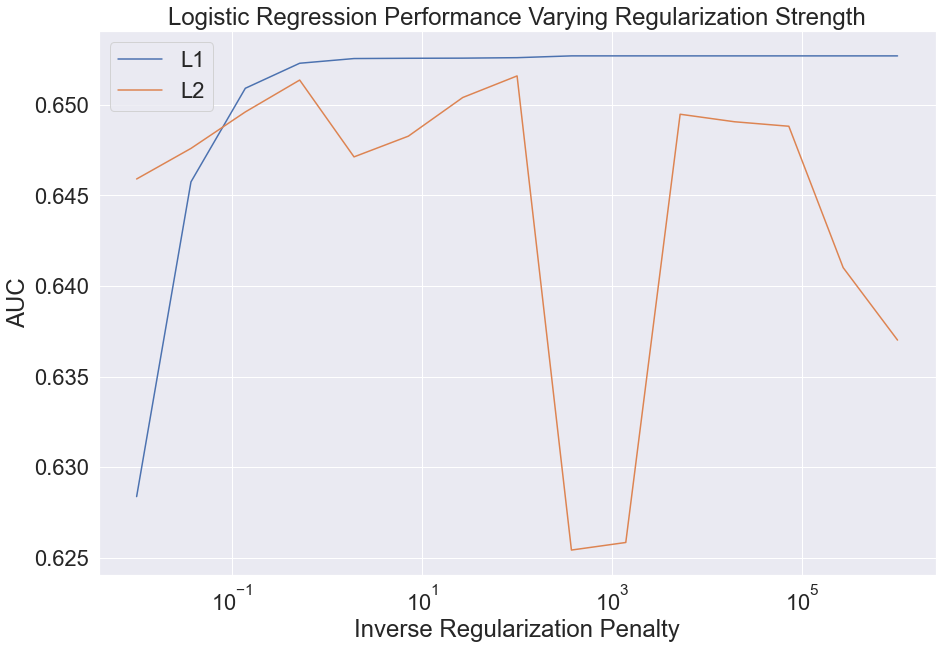

In [ ]:
# sns.set(font_scale = 2)
# plt.plot(10**penalties, l1_scores, label = "L1")
# plt.plot(10**penalties, l2_scores, label = "L2")
# plt.title("Logistic Regression Performance Varying Regularization Strength")
# plt.xlabel("Inverse Regularization Penalty")
# plt.ylabel("AUC")
# plt.legend()
# plt.xscale("log")
# plt.show()

In [ ]:
# l1_scores

[0.6283702241449312,
 0.6457514737738024,
 0.6509204840437524,
 0.6523026644517215,
 0.6525624184421713,
 0.6525770101424989,
 0.6525845775503613,
 0.6526108281278741,
 0.6527098923762529,
 0.6527100130685635,
 0.6527095423685528,
 0.6527093613300872,
 0.6527094096070113,
 0.6527094216762424,
 0.6527094096070114]

In [47]:
log = LogisticRegression()
log.fit(combine_X, combine_y)
ypred = log.predict(test_X)
ypred

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [48]:
pred_prob1 = log.predict_proba(test_X)
proba = pred_prob1[:,1]
proba

array([0.14022066, 0.20759219, 0.14539251, ..., 0.16229462, 0.21081971,
       0.15490716])

In [50]:
pd.DataFrame(proba).to_csv("log_probab.csv", index=None)


In [ ]:
# proba.to_csv('./log_proba.csv', index = None)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'